# Importing Libraries

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading and Loading Data

In [55]:
df = pd.read_csv('ecommerce_dataset.csv')
df.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,PricePerUnit,OrderDate,City,PaymentMethod,DeliveryStatus,CustomerRating,TotalPrice
0,ORD1000,CUST160,Other,27,Clothing,Perfume,4,155.05,2023-10-04,Durban,Cash,Delivered,2,620.20
1,ORD1001,CUST120,Male,36,Clothing,Puzzle,4,135.24,2023-06-05,Durban,Cash,Delivered,3,540.96
2,ORD1002,CUST172,Other,49,Books,Doll,1,183.27,2023-09-05,Port Elizabeth,Cash,Delivered,4,183.27
3,ORD1003,CUST154,Other,18,Books,Blender,3,48.38,2023-08-06,Port Elizabeth,Credit Card,Pending,5,145.14
4,ORD1004,CUST172,Male,22,Beauty,Shirt,1,468.79,2023-07-09,Port Elizabeth,Credit Card,Pending,2,468.79


# 1.Monthly Revenue Trend Analysis

## 1.1 Writing OrderDate in datetime format

In [56]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extraction of the month from OrderDate
df['Month'] = df['OrderDate'].dt.to_period('M')

## 1.2 Calculate total revenue per month.

In [57]:
#Total revenue per month
monthly_revenue = df.groupby('Month')['TotalPrice'].sum().reset_index()

#Month with the highest total sales
highest_sales_month = monthly_revenue.loc[monthly_revenue['TotalPrice'].idxmax()]
print("Month with highest sales:", highest_sales_month['Month'])
print("Total sales:", highest_sales_month['TotalPrice'])

Month with highest sales: 2023-12
Total sales: 33467.98


## 1.3 Line graph showing revenue trend and identifying the month with the highest total sales.

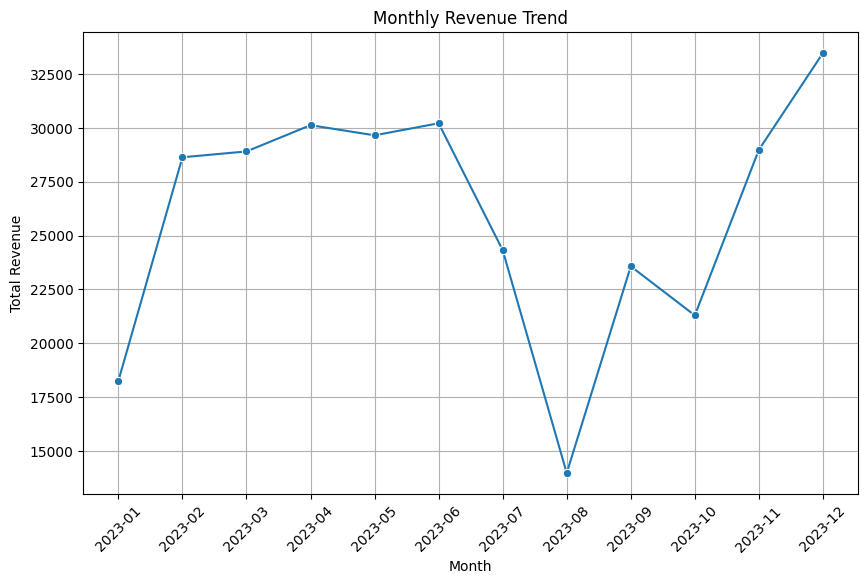

In [58]:
plt.figure(figsize=(10, 6))
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)
sns.lineplot(data=monthly_revenue, x='Month', y='TotalPrice', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2.Product Category vs. Ratings and Revenue

## 2.1 Average customer rating and total revenue per ProductCategory.

In [59]:
category_stats = df.groupby('ProductCategory').agg(
    AverageRating=('CustomerRating', 'mean'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()

print(category_stats)

  ProductCategory  AverageRating  TotalRevenue
0          Beauty       3.012048      55779.00
1           Books       3.284091      46149.75
2        Clothing       2.807692      48320.34
3     Electronics       2.709302      52399.18
4            Home       3.027778      43974.77
5            Toys       2.935484      64776.60


## 2.2 Average Rating by Product Category

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_1572\2791744084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_stats, x='ProductCategory', y='AverageRating', palette='viridis')
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_1572\2791744084.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_stats, x='ProductCategory', y='TotalRevenue', palette='viridis')


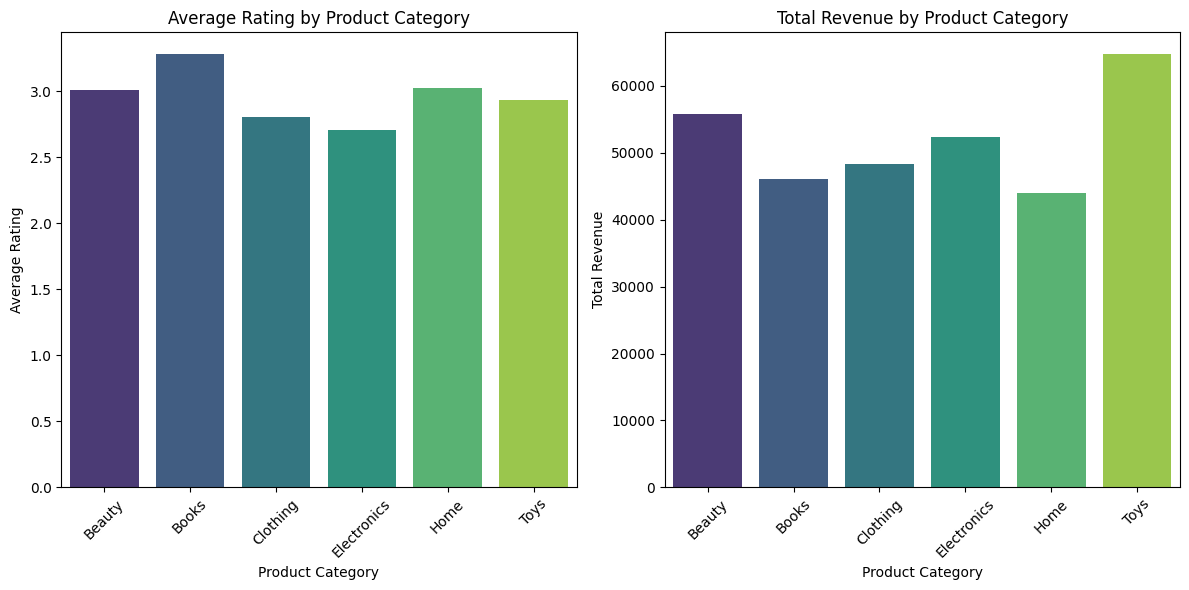

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=category_stats, x='ProductCategory', y='AverageRating', palette='viridis')
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

#Total Revenue by Product Category
plt.subplot(1, 2, 2)
sns.barplot(data=category_stats, x='ProductCategory', y='TotalRevenue', palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 2.3 Comments on whether the highest-rated category also earns the most revenue

In [61]:
#Comments
#The highest rated product category is Books with an average rating of 3.28 and total revenue of 46149.75
#The highest revenue is from the Toys category with a total revenue of 64776.60, therefore the highest-rated category is not necessarily the most profitable.

# 3.Payment Method Analysis

## 3.1 Most commonly used payment method

In [62]:
most_common_payment_method = df['PaymentMethod'].value_counts().idxmax()
print("Most commonly used payment method:", most_common_payment_method)

Most commonly used payment method: Credit Card


## 3.2 Payment method with the highest total revenue

In [63]:
payment_revenue = df.groupby('PaymentMethod')['TotalPrice'].sum().reset_index()
highest_revenue_payment_method = payment_revenue.loc[payment_revenue['TotalPrice'].idxmax()]
print("Payment method with the highest total revenue:", highest_revenue_payment_method['PaymentMethod'])
print("Total revenue:", highest_revenue_payment_method['TotalPrice'])


Payment method with the highest total revenue: Credit Card
Total revenue: 78658.5


## 3.3 Bar plot for revenue by payment method

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_1572\3438116221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_revenue, x='PaymentMethod', y='TotalPrice', palette='muted')


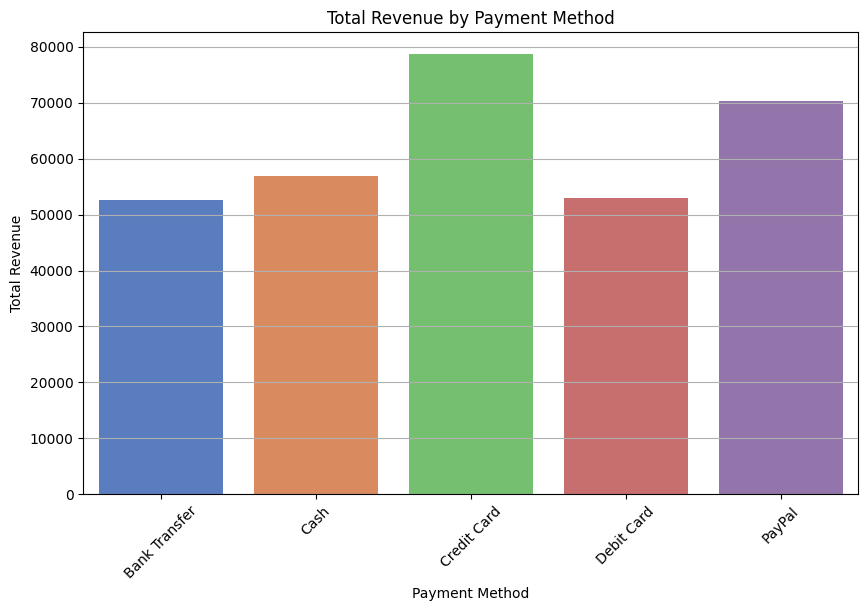

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_revenue, x='PaymentMethod', y='TotalPrice', palette='muted')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4.City-Based Sales & Order Value

## 4.1 Grouping data by City to calculate total sales and average order value

In [65]:
city_sales = df.groupby('City').agg(
    TotalSales=('TotalPrice', 'sum'),
    AverageOrderValue=('TotalPrice', 'mean')
).reset_index()

print(city_sales)

             City  TotalSales  AverageOrderValue
0       Cape Town    61234.09         618.526162
1          Durban    57744.81         607.840105
2    Johannesburg    66221.97         668.908788
3  Port Elizabeth    60787.20         590.166990
4        Pretoria    65411.57         628.957404


## 4.2 Selecting the top 3 cities by total sales

In [66]:
top_cities = city_sales.nlargest(3, 'TotalSales')
print("Top 3 cities by total sales:")
print(top_cities[['City', 'TotalSales']])

Top 3 cities by total sales:
           City  TotalSales
2  Johannesburg    66221.97
4      Pretoria    65411.57
0     Cape Town    61234.09


## 4.3 Bar plot for the top 3 cities

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_1572\2186651560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='TotalSales', palette='coolwarm')


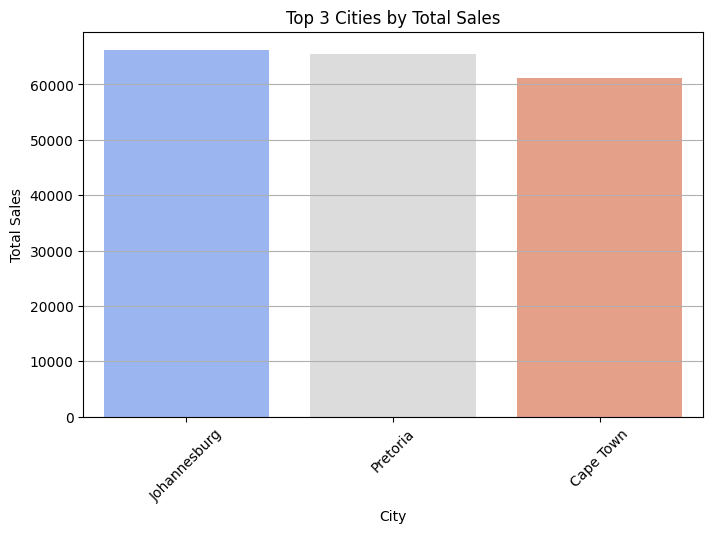

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_cities, x='City', y='TotalSales', palette='coolwarm')
plt.title('Top 3 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 5. Gender & Product Category Ratings Comparison.

## 5.1 Analyzing average ratings by Gender and Product Category

In [68]:

gender_category_ratings = df.groupby(['Gender', 'ProductCategory'])['CustomerRating'].mean().unstack()
print(gender_category_ratings)

ProductCategory    Beauty     Books  Clothing  Electronics      Home      Toys
Gender                                                                        
Female           3.281250  2.933333  2.518519     2.730769  3.150000  2.937500
Male             2.750000  3.515152  2.916667     2.689655  2.791667  3.033333
Other            2.956522  3.400000  3.000000     2.709677  3.142857  2.838710


## 5.2 Heatmap

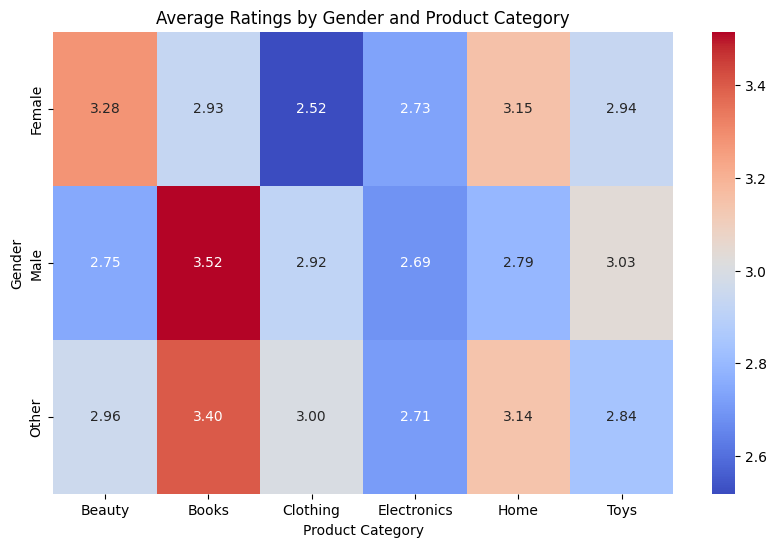

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(gender_category_ratings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Ratings by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()



## 5.3 Interpretation

In [70]:

#The heatmap displays the differences in average ratings for each product category by gender.
#You can see which gender has a tendency to give particular product categories better or lower ratings.
#The highest-rated product category is Books, with an average rating of 3.28.
#However, the Toys category generates the highest revenue, indicating that high ratings do not always correlate with high sales.

